# POLİNOM REGRESYON


DATA & IMPORT

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("community_health_evolved.csv")

In [16]:
df.head()

,yas,cinsiyet,irk,kilo,boy,visits,vki
0,47,0,4,111.0,165.0,28,40.77
1,26,1,3,127.0,168.0,23,45.00
2,26,1,2,90.0,173.0,14,30.07
3,39,1,3,107.0,185.0,21,31.26
4,55,1,1,90.0,155.0,27,37.46


In [17]:
x= df.drop("visits" , axis=1)
y= df["visits"]

# POLY FEAT

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
ply_conv = PolynomialFeatures(degree=2, include_bias=False)

In [20]:
ply_conv  

PolynomialFeatures(include_bias=False)

In [21]:
x.shape

(1000, 6)

In [26]:
ply_feat = ply_conv.fit_transform(x) 
# ply_conv.fit(x) # Modelin içine koy
# ply_conv.transform(x) # x in 27 satıra dönmesi

In [27]:
ply_feat.shape

# 6 dan 27 olmasının sebebi fonksiyonun polinom hale gelmesidir. 
# Formul ise ((n)*(n+1)) / 2 + ilk_shape

(1000, 27)

# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train , x_test , y_train , y_test = train_test_split(ply_feat , y ,  test_size=0.3 , random_state=99)

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression(fit_intercept=True) # Polinomdan geliyoruz demek


In [34]:
model.fit(X_train , y_train)

LinearRegression()

In [35]:
poly_pred = model.predict(x_test)

In [36]:
poly_pred

array([25.61683382, 16.27359252, 15.73894567, 11.79983937, 28.74592571,
       12.14550334, 18.35431868, 15.38342566, 26.19541461, 15.95964819,
       13.4385745 , 16.89027665, 17.55579011, 13.36310463, 27.58492887,
       11.69459269, 17.59860679, 21.84236479, 23.87240349, 12.58662041,
       11.69258705, 31.31004233, 19.30644428, 16.61708477, 21.45832677,
       23.09012148, 21.9281036 , 14.19670367, 33.41658689, 16.2922813 ,
       17.85668496, 28.44592584, 22.62646723, 30.70465824, 27.27376183,
       13.22935259, 18.22171876, 20.75881083, 10.99763181, 24.24861097,
       19.16884439, 18.1976085 , 25.29840328, 20.55176945, 13.06493573,
       16.74001776, 24.7864396 ,  8.70533077, 19.7524904 , 27.51318698,
       20.40450035, 23.6819784 , 22.55857128, 16.19712699,  8.04153129,
       17.82577471, 14.84196168, 16.91151952, 30.83271261, 21.74636434,
       21.51133895, 18.47106883, 12.71183781, 24.76097857, 17.41973259,
       14.43011828, 19.49130452, 13.93871557, 15.85693948, 37.02

# Performans

In [47]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [48]:
mae = mean_absolute_error(y_test , poly_pred)
rmse = np.sqrt(mean_squared_error(y_test , poly_pred))
r2= r2_score(y_test , poly_pred)


In [49]:
print("MAE : " , mae)
print("RMSE :" , rmse)
print("R2 : ",r2)

MAE :  2.1490594343748564
RMSE : 2.5223022315460564
R2 :  0.854767084526671


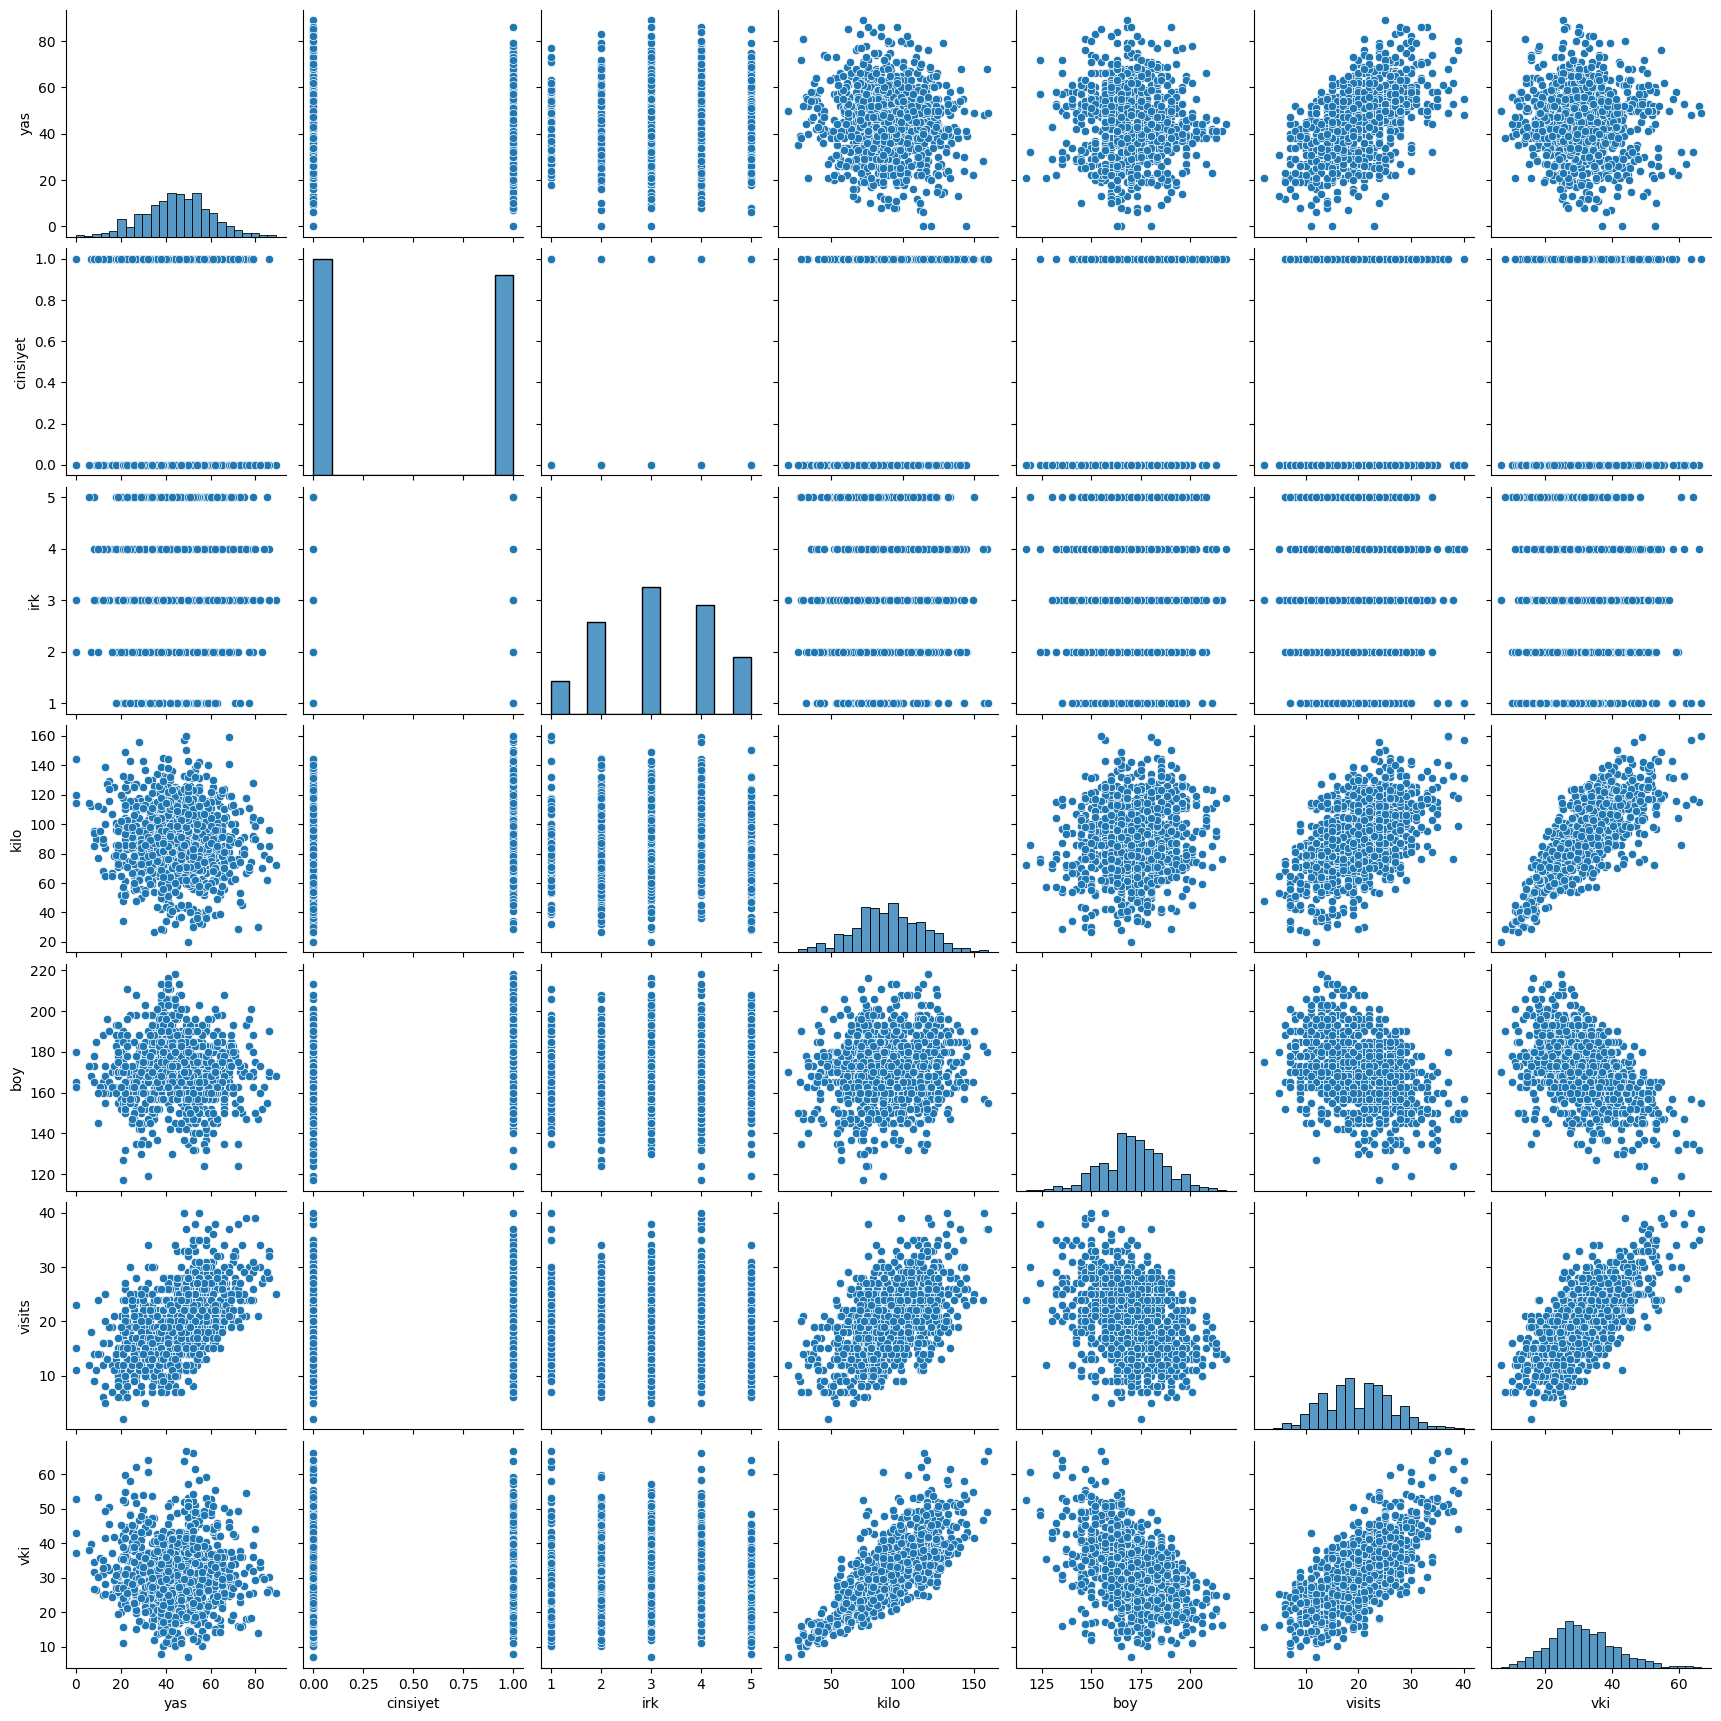

In [50]:
sns.pairplot(df)